In [ ]:
# Intententamos simular como va a comportarse el precio de una acción en la bolsa de valores

In [ ]:
!pip install yfinance

In [ ]:
# Importamos todas las librerías que vamos a usar

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
# Obtenemos todos los valores de la acción buscando la información en YahooFinance

# Definir el símbolo de la acción
simbolo = "AAPL"

# Descargar datos históricos del último año
fecha_inicio = pd.Timestamp.today() - pd.DateOffset(years=1)
datos_historicos = yf.download(simbolo, start=fecha_inicio, end=pd.Timestamp.today())

# Calcular el promedio entre el precio de apertura y el precio de cierre
datos_historicos["Promedio"] = (datos_historicos["Open"] + datos_historicos["Close"]) / 2

display(datos_historicos[["Promedio"]])


[*********************100%%**********************]  1 of 1 completed


,Promedio
Date,
2023-04-21,165.035004
2023-04-24,165.165001
2023-04-25,164.480003
2023-04-26,163.409996
2023-04-27,166.800003
...,...
2024-04-15,174.025002
2024-04-16,170.565002
2024-04-17,168.805000


In [ ]:
# Creamos la matriz de frecuencias con las Subidas y las Bajadas de la acción:

# Calcular la diferencia entre el valor actual y el anterior en la columna "Promedio"
datos_historicos["Frecuencia_o"] = np.where(datos_historicos["Promedio"].diff() > 0, "Subió", "Bajó")

# Crear una nueva columna que indique el cambio anterior
datos_historicos["Frecuencia_f"] = datos_historicos["Frecuencia_o"].shift(1)

# Contar la frecuencia de cada caso
matriz_frecuencias = pd.crosstab(datos_historicos["Frecuencia_f"], datos_historicos["Frecuencia_o"])

# Reordenar las filas y columnas
matriz_frecuencias = matriz_frecuencias.reindex(["Subió", "Bajó"], axis=0).reindex(["Subió", "Bajó"], axis=1)

display(matriz_frecuencias)



Frecuencia_o,Subió,Bajó
Frecuencia_f,,
Subió,87,43
Bajó,43,77


In [ ]:
# Hacemos la matriz de transición

# Dividir la frecuencia por la cantidad total de eventos para cada fila
matriz_probabilidades = matriz_frecuencias.div(matriz_frecuencias.sum(axis=1), axis=0)

display(matriz_probabilidades)



Frecuencia_o,Subió,Bajó
Frecuencia_f,,
Subió,0.669231,0.330769
Bajó,0.358333,0.641667


In [ ]:
# Cálculo de diferencias.
datos_historicos['Diff'] = datos_historicos["Promedio"].diff()

# Cálculo de medias y desvíos de subida y bajada históricos.
subida_media = abs(datos_historicos[datos_historicos['Frecuencia_f'] == 'Subió']['Diff']).dropna().mean()
subida_desvio = abs(datos_historicos[datos_historicos['Frecuencia_f'] == 'Subió']['Diff']).dropna().std()
bajada_media = abs(datos_historicos[datos_historicos['Frecuencia_f'] == 'Bajó']['Diff']).dropna().mean()
bajada_desvio = abs(datos_historicos[datos_historicos['Frecuencia_f'] == 'Bajó']['Diff']).dropna().std()

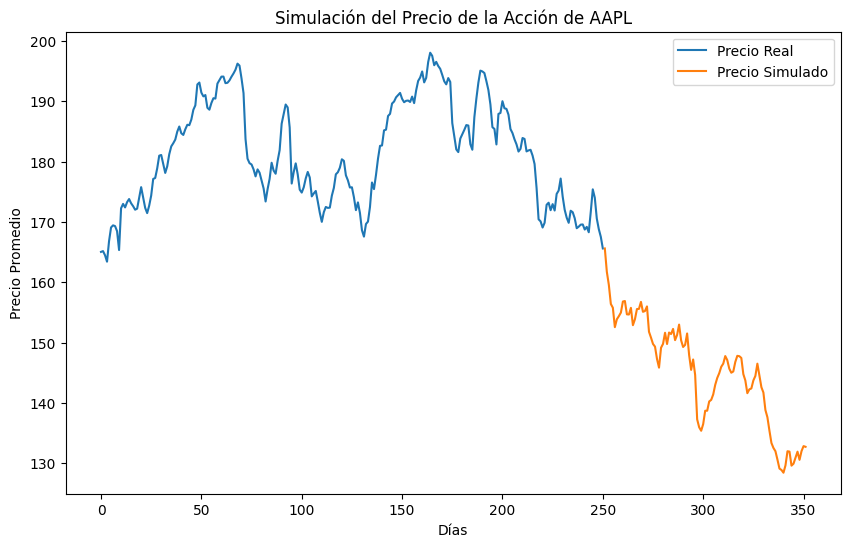

In [ ]:
# Simulación del camino del precio de la acción
num_pasos = 100
precio_actual = datos_historicos["Promedio"].iloc[-1]  # Precio actual de la acción
precios_simulados = [precio_actual]
cambio = datos_historicos["Frecuencia_o"].iloc[-1]

for _ in range(num_pasos):
    cambio = np.random.choice(["Subió", "Bajó"], p=matriz_probabilidades.loc[cambio])

    if cambio == "Subió":
        incremental = abs(np.random.normal(subida_media, subida_desvio))
        precio_actual = precio_actual + incremental  # Sampleo normal media y desvío históricos de subida.
    else:
        incremental = abs(np.random.normal(bajada_media, bajada_desvio))
        precio_actual = precio_actual - incremental  # Sampleo normal media y desvío históricos de bajada.

    precios_simulados.append(precio_actual)

# Plot del camino del precio simulado
plt.figure(figsize=(10, 6))
plt.plot(range(len(datos_historicos)), datos_historicos["Promedio"], label="Precio Real")
plt.plot(range(len(datos_historicos), len(datos_historicos) + num_pasos + 1), precios_simulados, label="Precio Simulado")
plt.xlabel("Días")
plt.ylabel("Precio Promedio")
plt.title("Simulación del Precio de la Acción de " f"{simbolo}")
plt.legend()
plt.show()
